# Identification
Please indicate your name

Student 1: HIBAOUI Imane

Student 2: GROC Simon

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div><img src="attachment:sinus2d.png" width=200></div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
#%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.
<>

In [2]:
A = 1
theta = 45
L = 512
T0 = 64
Ts = 1

signal = sinusoid2d(A, theta, L, T0, Ts)
print(signal)

[[ 1.          0.9975914   0.99037719 ... -0.7128209  -0.66245561
  -0.60889914]
 [ 0.9975914   1.          0.9975914  ... -0.75975238 -0.7128209
  -0.66245561]
 [ 0.99037719  0.9975914   1.         ... -0.80302397 -0.75975238
  -0.7128209 ]
 ...
 [-0.7128209  -0.75975238 -0.80302397 ...  1.          0.9975914
   0.99037719]
 [-0.66245561 -0.7128209  -0.75975238 ...  0.9975914   1.
   0.9975914 ]
 [-0.60889914 -0.66245561 -0.7128209  ...  0.99037719  0.9975914
   1.        ]]


2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

pour conetre la frecence de le fmax du signal s45 il vous faut caculer la frecence maximale du signal sur t et sur u on fais donc:
on fais donc ftmax = f0*cos(45°) on sais que f0 = 1/64 parce que f0 = 1/T0 et que cos(theta) = cos(45°) = sqrt(2)/2 on a donc ftmax = (1/64)*sqrt(2)/2 = 0.011048543456039806
on fais les meme calcule pour fumax mais avec le sinuce a la place du cosinuse pouis on compare les deux et on optins 

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

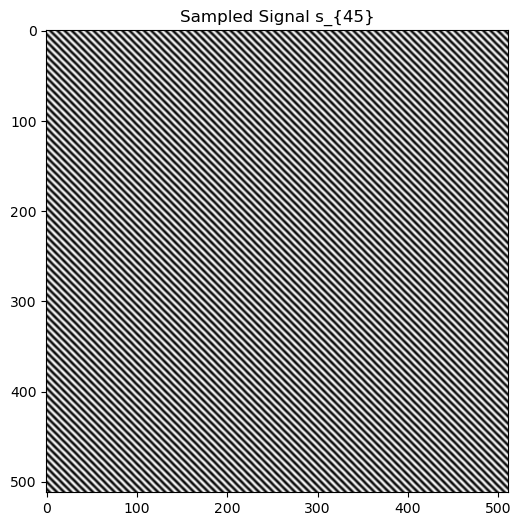

In [3]:
fm = np.sqrt(2) / 128

fs = 16 * fm
Ts_new = 1/fs
sampled_signal = sinusoid2d(A, theta, L, Ts_new, 1)
imshow(sampled_signal, "Sampled Signal s_{45}")

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

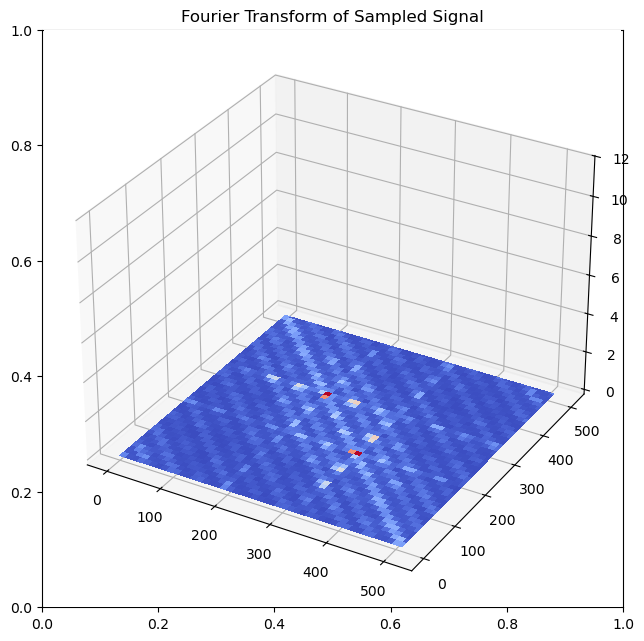

In [4]:
fourier_transform = fftshift(fft2(sampled_signal))

magnitude_spectrum = np.log(np.abs(fourier_transform) + 1)

surf(magnitude_spectrum, title="Fourier Transform of Sampled Signal")

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

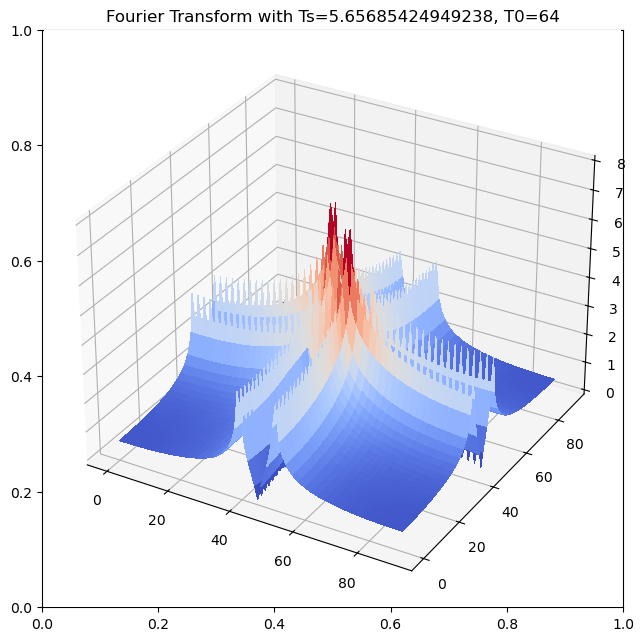

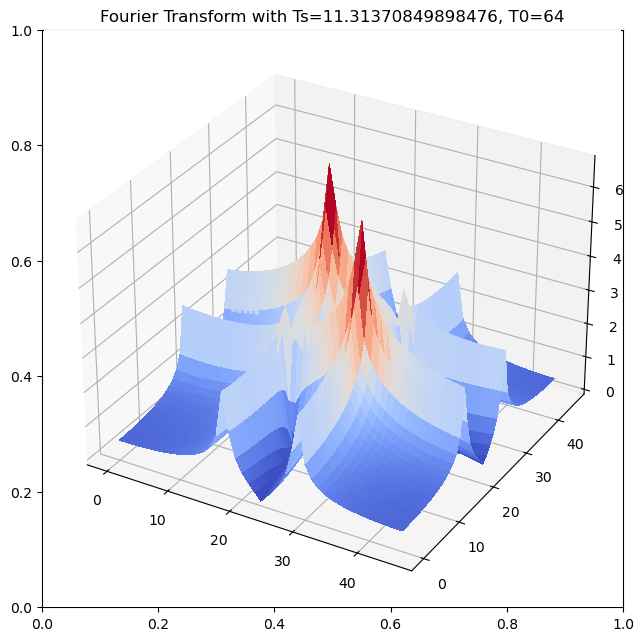

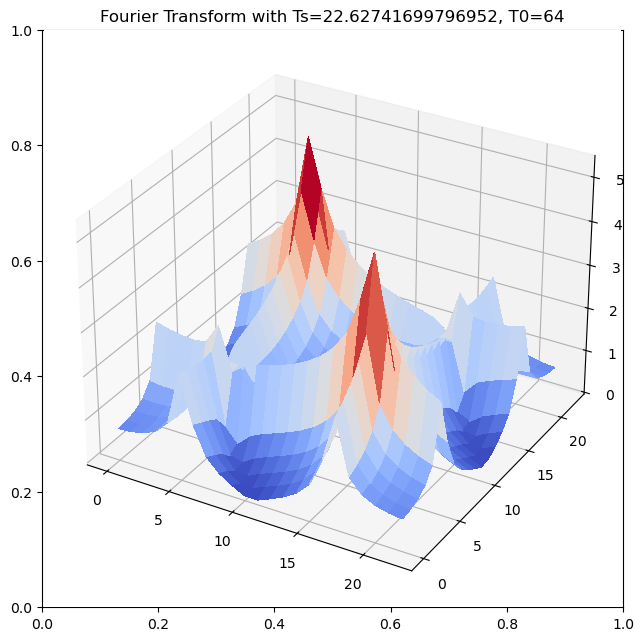

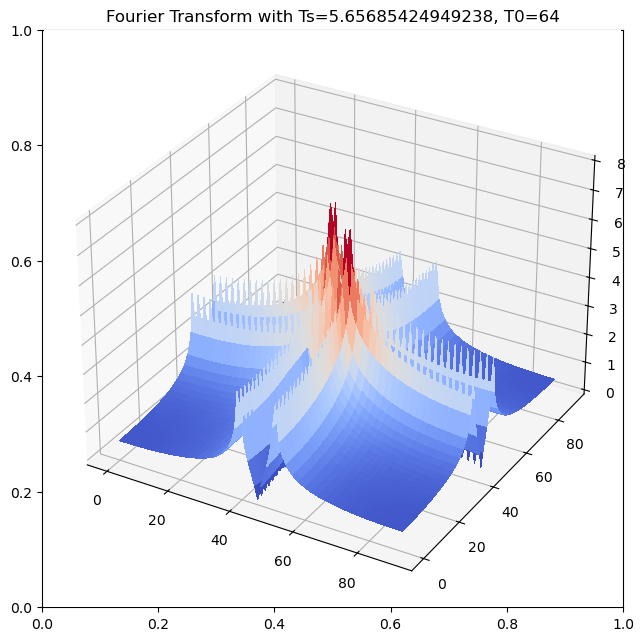

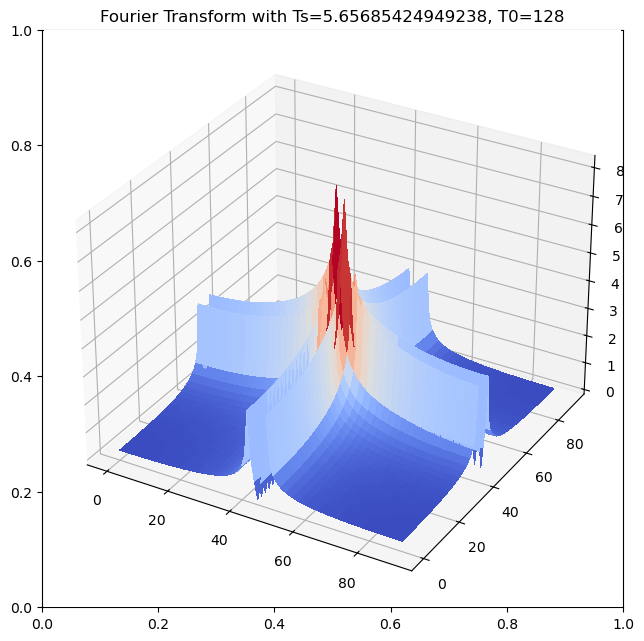

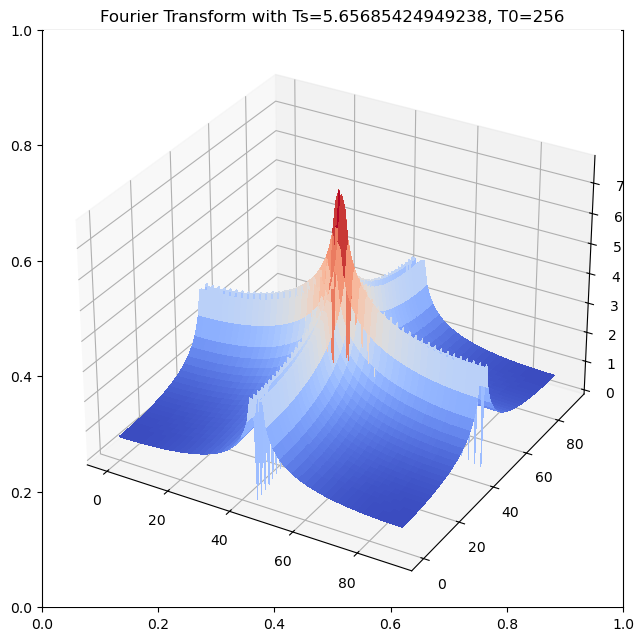

In [5]:
def calculate_fourier_spectrum(Ts, T0):
    sampled_signal = sinusoid2d(A, theta, L, T0, Ts)
    
    fourier_transform = fftshift(fft2(sampled_signal))
    
    magnitude_spectrum = np.log(np.abs(fourier_transform) + 1)
    
    surf(magnitude_spectrum, title=f"Fourier Transform with Ts={Ts}, T0={T0}")
    
Ts_values = [Ts_new, Ts_new * 2, Ts_new * 4] 
T0_values = [T0, T0 * 2, T0 * 4] 

for Ts_val in Ts_values:
    calculate_fourier_spectrum(Ts_val, T0)

for T0_val in T0_values:
    calculate_fourier_spectrum(Ts_new, T0_val)

# Les deux pics de Dirac sont bien visibles dans le spectre, confirmant la périodicité du signal.
# En modifiant Ts, on observe que lorsque Ts augmente, les pics se rapprochent, provoquant un repliement du spectre.
# La différence avec le signal continu provient de ce repliement spectral qui apparaît lors de l'échantillonnage.
# Les lobes autour des pics sont dus à la fonction sinc utilisée dans l'interpolation de Shannon.
# En augmentant T0, les deux pics finissent par fusionner, montrant que l'échantillonnage dépasse la fréquence de Nyquist, causant la perte d'information.


3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

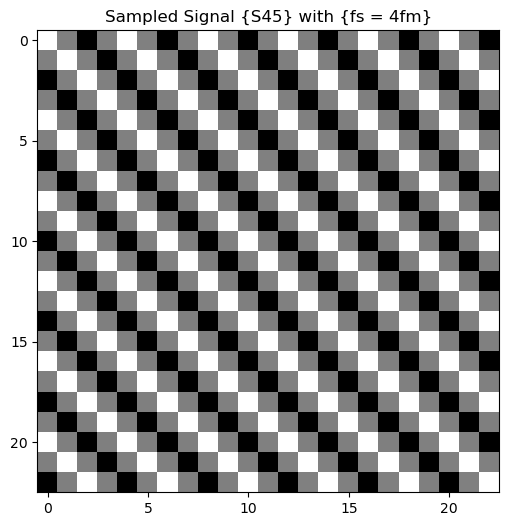

In [6]:
fs_new = 4 * fm  
Ts_new_4fm = 1 / fs_new  


sampled_signal_4fm = sinusoid2d(A, theta, L, T0, Ts_new_4fm)

imshow(sampled_signal_4fm, "Sampled Signal {S45} with {fs = 4fm}")

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [7]:
def error(x_r, x_d, A, L):
    epsilon_r = (1 / (2 * A * L**2)) * np.sum(np.abs(x_r - x_d))
    return epsilon_r

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

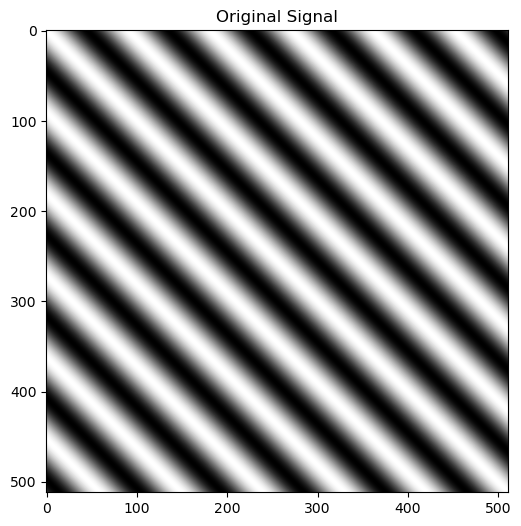

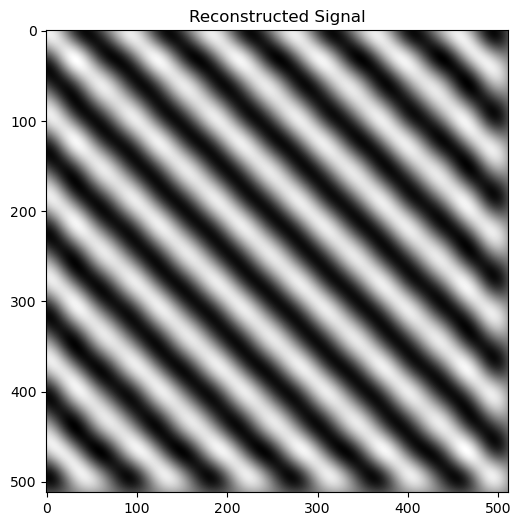

Relative Average Error: 0.022936924363103007


In [8]:
fm = np.sqrt(2) / 128
fs = 4 * fm
Ts = 1 / fs
original_signal = sinusoid2d(A, theta, L, T0, 1)

sampled_signal = sinusoid2d(A, theta, L, T0, Ts)

reconstructed_signal = shannonInterpolation(sampled_signal, Ts, L)

imshow(original_signal, "Original Signal")

imshow(reconstructed_signal, "Reconstructed Signal")

relative_error = error(original_signal, reconstructed_signal, A, L)
print(f"Relative Average Error: {relative_error}")

# L'erreur relative est due à la perte d'information lors de l'échantillonnage, notamment à cause du repliement spectral (aliasing) qui affecte légèrement la reconstruction.


4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

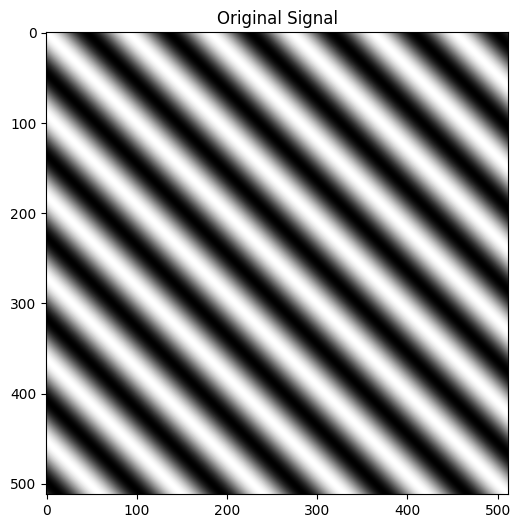

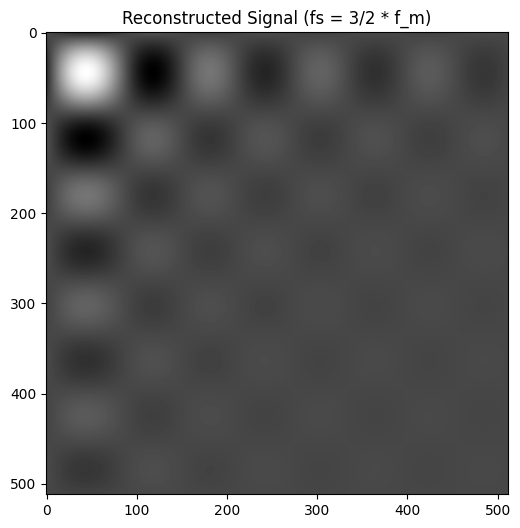

Relative Average Error (fs = 3/2 * f_m): 0.3184166138771527


In [41]:
fs_new = (3/2) * fm  
Ts_new = 1 / fs_new  

sampled_signal_new = sinusoid2d(A, theta, L, T0, Ts_new)

reconstructed_signal_new = shannonInterpolation(sampled_signal_new, Ts_new, L)

imshow(original_signal, "Original Signal")

imshow(reconstructed_signal_new, "Reconstructed Signal (fs = 3/2 * f_m)")

relative_error_new = error(original_signal, reconstructed_signal_new, A, L)
print(f"Relative Average Error (fs = 3/2 * f_m): {relative_error_new}")

# L'erreur élevée (0.318) est causée par une fréquence d'échantillonnage inférieure à la fréquence de Nyquist (fs = 3/2 * fm), ce qui entraîne un repliement du spectre et une mauvaise reconstruction du signal.


5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

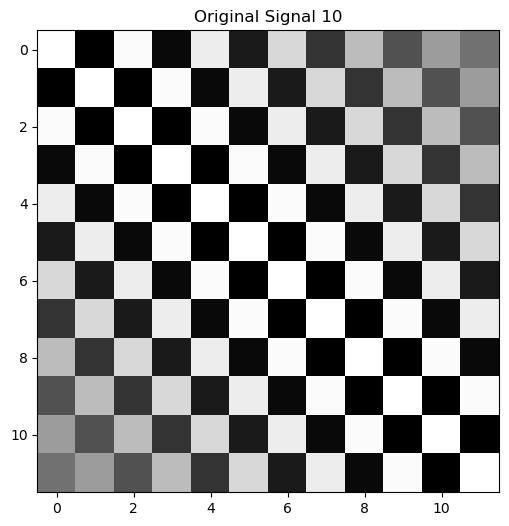

In [9]:
fm = max(1/T0*np.cos(10*np.pi/180), 1/T0*np.sin(10*np.pi/180))
fs_new = (3/2) * fm  
Ts_new = 1 / fs_new  
original_signal = sinusoid2d(A, theta, L, T0, Ts_new)
imshow(original_signal, "Original Signal 10")

# Après reconstruction avec un échantillonnage de (3/2) * f_s, certaines parties de l'image sont 
# floues à cause du sous-échantillonnage, entraînant un repliement du spectre et la perte des hautes fréquences.
# Cet effet est plus prononcé car θ (=10°) est faible, rendant les fréquences dans la direction u plus sensibles.


6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [17]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

def shannonInterpolationLoop(I, Ts, L):
    """Shannon interpolation using four nested loops (C-like implementation)."""
    n, m = I.shape
    x_r = np.zeros((L, L))  # Signal reconstruit

    # Implémentation de l'interpolation de Shannon avec quatre boucles imbriquées
    for i in range(L):  # Boucle sur le signal reconstruit
        for j in range(L):
            for k in range(n):  # Boucle sur le signal échantillonné
                for l in range(m):
                    x_r[i, j] += I[k, l] * np.sinc((i - k * Ts) / Ts) * np.sinc((j - l * Ts) / Ts)

    return x_r

sampled_signal = sinusoid2d(A, theta, 64, T0, Ts)

print("Exécution de shannonInterpolationLoop :")
tic()
reconstructed_loop = shannonInterpolationLoop(sampled_signal, Ts, 64)
tac()

print("Exécution de shannonInterpolation (vectorisée) :")
tic()
reconstructed_vectorized = shannonInterpolation(sampled_signal, Ts, 64)
tac()

# shannonInterpolationLoop() est beaucoup plus lente (0.296875 s) que la version vectorisée (0 s) pour L = 64.
# Cette différence est due à la manière dont les boucles sont gérées : dans shannonInterpolationLoop(), chaque
# opération est effectuée séquentiellement, alors que la version vectorisée exploite l'optimisation interne
# de NumPy pour effectuer les calculs rapides.

Exécution de shannonInterpolationLoop :
0.359375
Exécution de shannonInterpolation (vectorisée) :
0.0



## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 


Une sous-échantillonnage d'un facteur 2 consiste à réduire la résolution de l'image en ne conservant qu'un pixel sur deux, à la fois horizontalement et verticalement, ce qui divise la taille de l'image par quatre. Cela entraîne une perte de détails et, sans filtrage adéquat (comme un filtre passe-bas), peut provoquer un aliasing, où les hautes fréquences sont mal interprétées, créant des artefacts visuels comme des bords irréguliers ou des motifs indésirables.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

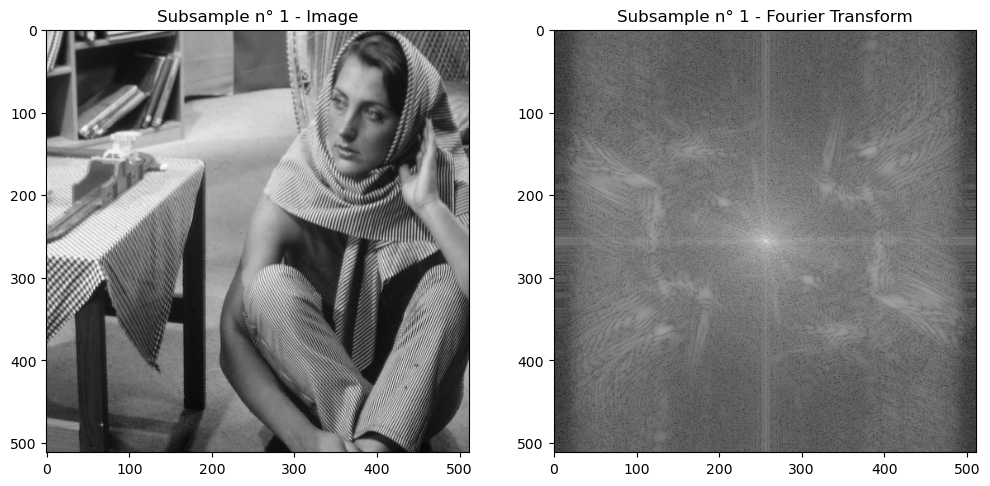

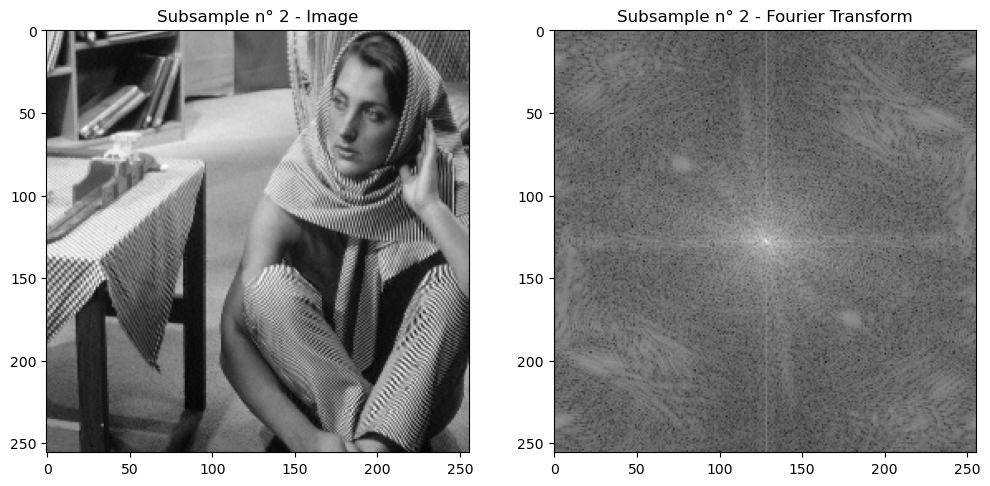

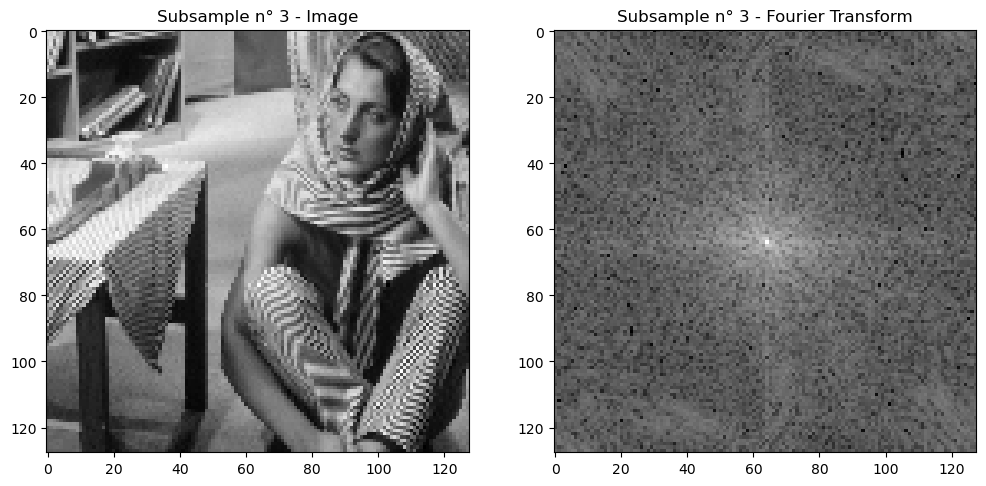

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#pip install numpy matplotlib pillow

image = np.array(Image.open('img/barbara.png').convert('L'))

def subSample2(img):
    return img[::2, ::2]

def compute_fourier_transform(img):
    f_transform = np.fft.fftshift(np.fft.fft2(img))
    magnitude_spectrum = np.log(np.abs(f_transform) + 1)
    return magnitude_spectrum

def display_results(img, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(f'{title} - Image')
    axs[1].imshow(compute_fourier_transform(img), cmap='gray')
    axs[1].set_title(f'{title} - Fourier Transform')
    plt.show()

image_subsampled = image
for i in range(3):
    display_results(image_subsampled, f'Subsample n° {i+1}')
    image_subsampled = subSample2(image_subsampled)

# L'aliasing apparaît dans les images sous-échantillonnées sous forme d'artefacts visuels,
# avec une perte de détails et des motifs indésirables. Cela se voit dans la transformée de Fourier,
# où les hautes fréquences sont mal interprétées. L'aliasing est un problème car il déforme l'image
# en mélangeant les fréquences et empêche de récupérer les détails d'origine.


3. Same question with the image `img/mandrill.png`.

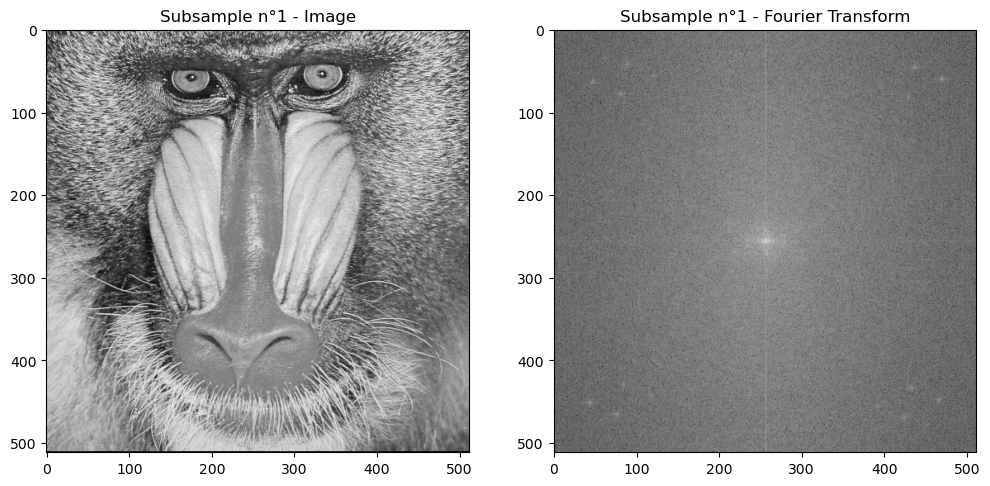

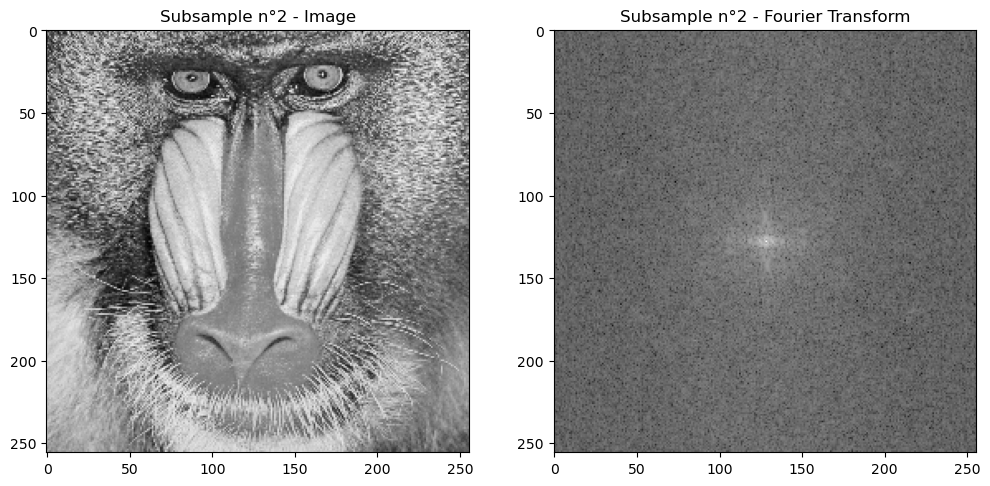

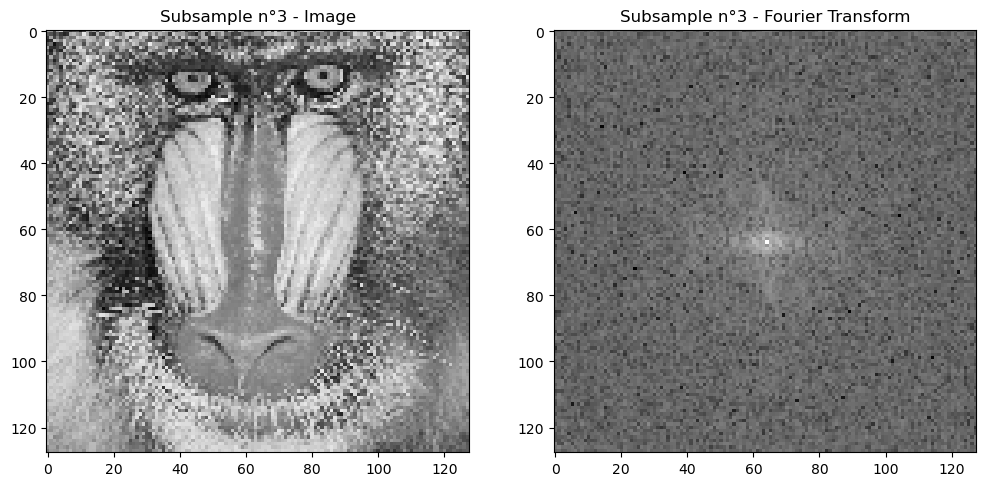

In [18]:
mandrill = np.array(Image.open('img/mandrill.png'))

image = np.array(Image.open('img/mandrill.png').convert('L')) 
image_subsampled = image
for i in range(3):
    display_results(image_subsampled, f'Subsample n°{i+1}')
    image_subsampled = subSample2(image_subsampled)

# Avec chaque sous-échantillonnage, on observe une perte progressive des détails dans l'image, 
# particulièrement visible dans la 3ème sous-image où des blocs pixélisés apparaissent.
# Les hautes fréquences ne sont pas correctement représentées, ce qui est confirmé par les spectres 
# de Fourier qui deviennent de plus en plus bruités et flous. L'aliasing provoque des artefacts visibles 
# dans les parties à fort contraste de l'image, comme le visage. Cela est dû au fait que les fréquences élevées 
# ne sont plus correctement échantillonnées, ce qui résulte en une mauvaise reconstruction de l'image.
